<a href="https://colab.research.google.com/github/Sweekar-Bajimaya/Customer-Segmentation-With-K-Means-Clustering/blob/main/Customer_Segmentaion_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 **Customer Segmentation using K-Means Clustering**

This project applies unsupervised learning techniques to segment customers based on their purchasing behavior in a marketing campaign. By understanding different customer groups, businesses can tailor their marketing strategies to boost engagement, conversion, and retention.

**Objective**: Identify distinct customer segments to support personalized marketing strategies and targeted outreach.

**Dataset Source**: [marketing_campaign.csv] — includes customer purchase behavior across different channels like web, catalog, and in-store purchases.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')

## 📄 **Data Dictionary**

- `NumDealsPurchases`: Number of purchases made with a discount
- `NumWebPurchases`: Purchases made through the company’s website
- `NumCatalogPurchases`: Purchases made through catalog
- `NumStorePurchases`: Purchases made directly in store
- `NumWebVisitsMonth`: Number of times a customer visited the company’s website in the last month

These features are used to segment customers based on their interaction and purchasing habits across various marketing channels.


## Data Exploration

In [ ]:
print("The first 5 rows of the dataset are: \n ")
df.head()

The first 5 rows of the dataset are: 
 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("The last 5 rows of the dataset are: \n ")
df.tail()

The last 5 rows of the dataset are: 
 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (2240, 29)


In [ ]:
print("Getting information of the dataset: \n ")
df.info()

Getting information of the dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15 

In [ ]:
print("The columns of the dataset are: \n ")
df.columns

The columns of the dataset are: 
 


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
print("Data types of the columns are: \n ")
df.dtypes

Data types of the columns are: 
 


,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
print("Checking for missing values: \n ")
df.isnull().sum()

Checking for missing values: 
 


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
print("Checking for duplicate values: \n ")
df.duplicated().sum()

Checking for duplicate values: 
 


np.int64(0)

## Data Cleaning and Selecting Key features

In [ ]:
print("Dropping the columns 'ID' and 'Income': \n")
df.drop(['ID', 'Income'], axis=1, inplace=True)

Dropping the columns 'ID' and 'Income': 



In [ ]:
print("Selecting Key features of dataset for doing segmentation by where and how often customers shop.\n")
channel_features = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
print (channel_features.columns)

Selecting Key features of dataset for doing segmentation by where and how often customers shop.

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')


## Normalizing Data

**Using Elbow method to find Optimal clusters**

In [ ]:
scaler = StandardScaler()
channel_features_scaled = scaler.fit_transform(channel_features)

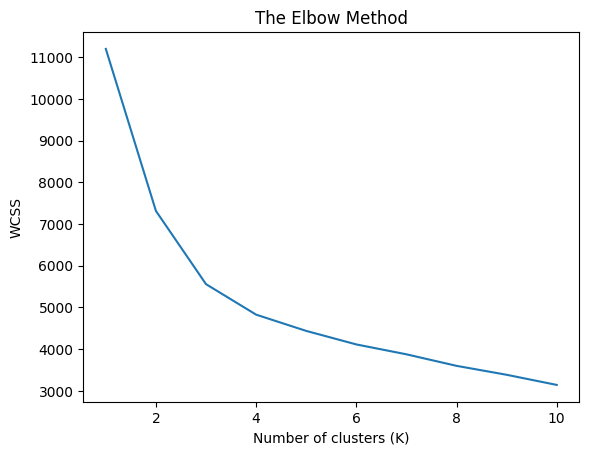

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(channel_features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

Thus, The number of Cluster for this dataset will be 3.

## Training with KMeans Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(channel_features_scaled)

print("The cluster labels are: \n")
print(clusters)

The cluster labels are: 

[2 0 1 ... 1 1 0]


In [ ]:
df['channel_segment'] = clusters

## Analyze the Segments

In [ ]:
# View cluster profiles
df.groupby('channel_segment')[['NumDealsPurchases', 'NumWebPurchases',
                               'NumCatalogPurchases', 'NumStorePurchases',
                               'NumWebVisitsMonth']].mean().round(2)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
channel_segment,,,,,
0,1.87,2.03,0.55,3.18,6.41
1,1.39,4.90,5.59,8.47,2.81
2,4.49,6.99,2.77,7.22,6.61


In [ ]:
print("PCA 1 (x-axis):", channel_features_pca[:5, 0])
print("PCA 2 (y-axis):", channel_features_pca[:5, 1])

PCA 1 (x-axis): [ 1.34765886 -1.36632127  1.44546368 -1.24949639  0.26616146]
PCA 2 (y-axis): [ 1.06349925 -0.82479791  0.07131259 -0.36060478  1.09383093]


## Visulaization of all Clusters with its centroids

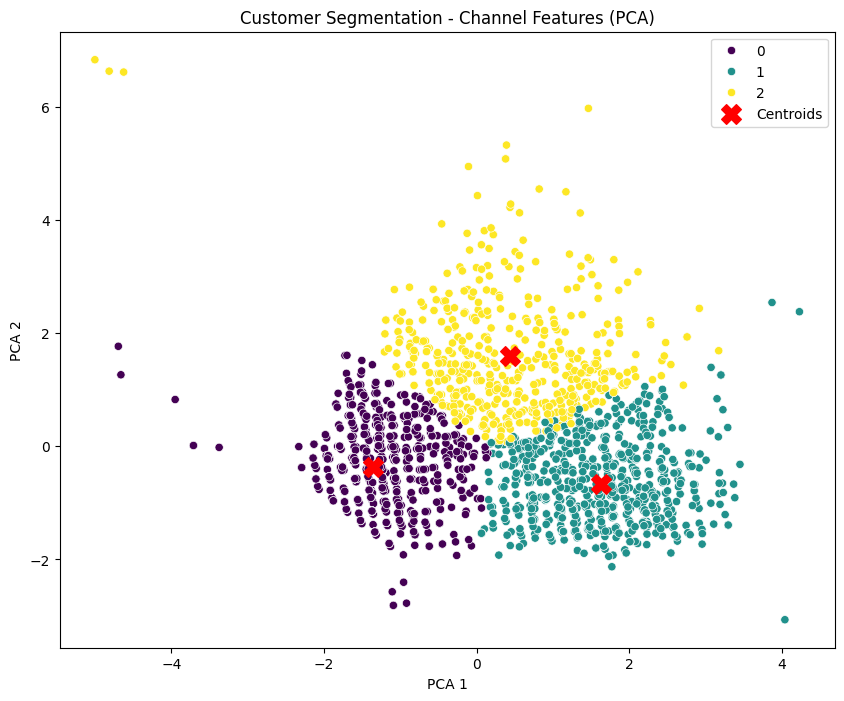

In [ ]:
# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
channel_features_pca = pca.fit_transform(channel_features_scaled)

# Adding PCA results to the dataframe for easier plotting
df['pca_x'] = channel_features_pca[:, 0]
df['pca_y'] = channel_features_pca[:, 1]

# Get the centroids of the clusters in the scaled feature space
centroids_scaled = kmeans.cluster_centers_

# Transform the centroids to the PCA space
centroids_pca = pca.transform(centroids_scaled)

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='channel_segment', data=df, palette='viridis', legend='full')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('Customer Segmentation - Channel Features (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## 🧩 **Cluster Profile Interpretation**

We identified 3 distinct customer segments using K-Means clustering:

- **Segment 0: The Frequent Buyers**
  - High number of web and store purchases
  - High engagement and potential for upselling
  - Ideal for loyalty programs and premium offers

- **Segment 1: The Window Shoppers**
  - Frequent website visits, but lower purchases across all channels
  - May need targeted promotions or retargeting ads to convert

- **Segment 2: Traditional Shoppers**
  - Higher catalog and in-store purchases, fewer online interactions
  - Prefer traditional channels; suitable for catalog campaigns or in-store promotions


## ✅ **Business Recommendations**

- **Segment 0** should be prioritized for **digital campaigns**, exclusive online offers, and early access deals due to their high online activity and purchasing behavior.
- **Segment 1** may benefit from **targeted conversion strategies** such as personalized email campaigns, special discount codes, or abandoned cart reminders.
- **Segment 2** aligns more with traditional retail strategies. Focus on **print-based marketing** and in-store engagement campaigns.

Understanding these segments allows for **targeted marketing**, **optimized ad spend**, and improved **customer satisfaction**.
